# Machine Learning Engineer Nanodegree
## Capstone Project
## Financial Time Series Prediction via Machine Learning

The aim of this project is to explore various machine learning techniques as an attempt to predict Hang Seng index 1-day price movement. 

43 global exchange indices will be used as features, and to predict Hang Seng indices next day movement direction (Up/Down/Neutral). The data in obtained from FactSet Terminal. Data starts from 1st Jan 2010 up to 30th June 2017.


## Loading the data

First, lets load the data and the required libraries

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Visuals display
%matplotlib inline

#Load the index data
raw_data = pd.read_csv('index_data.csv')
raw_data.set_index(['Date'])

#Relabeling the data
#relabeling the index data
index_close = raw_data.iloc[:,1:]
dates = raw_data.iloc[:,0]

#Display first 5 rows
raw_data.head()



Date  Hang Seng Index  SSE Composite Index  ASX All Ordinaries  \
0  20100101         21872.50             3277.139              4882.7   
1  20100104         21823.28             3243.760              4889.8   
2  20100105         22279.58             3282.179              4939.5   
3  20100106         22416.67             3254.215              4946.8   
4  20100107         22269.45             3192.776              4930.5   

   India S&P BSE SENSEX   TOPIX  KOSPI Composite Index  Taiwan TAIEX  \
0              17464.81  907.59                1682.77       8188.11   
1              17558.73  915.75                1696.14       8207.85   
2              17686.24  919.57                1690.62       8211.40   
3              17701.13  931.13                1705.32       8327.62   
4              17615.72  931.85                1683.45       8237.42   

   FTSE Bursa Malaysia KLCI  FTSE Straits Times Index  \
0                   1272.78                   2897.62   
1                   1275.75                   2894.55   
2                   1288.24                   2920.28   
3                   1293.17                   2930.49   
4                   1291.42                   2913.25   

               ...                 S&P 500  DJ Industrial Average  \
0              ...                1115.100               10428.05   
1              ...                1132.990               10583.96   
2              ...                1136.520               10572.02   
3              ...                1137.140               10573.68   
4              ...                1141.695               10606.86   

   Colombia IGBC  Canada S&P/TSX Composite  Brazil Bovespa Index  Mexico IPC  \
0       11602.14                  11746.11              68588.41    32120.47   
1       11641.37                  11866.90              70045.08    32758.53   
2       11628.92                  11888.08              70239.82    32732.76   
3       11626.59                  11944.54              70729.34    32830.16   
4       11594.89                  11887.51              70451.12    33064.57   

   Israel TA-125  Saudi Arabia All Share (TASI)  FTSE JSE All Share  \
0        1064.98                        6121.76            27666.45   
1        1089.34                        6201.76            27895.19   
2        1098.20                        6239.10            27998.87   
3        1098.31                        6260.90            28080.36   
4        1094.04                        6260.90            28017.81   

   Abu Dhabi Securities Exchange  
0                        2743.61  
1                        2758.09  
2                        2774.50  
3                        2766.53  
4                        2775.50  

[5 rows x 44 columns]

## Data Preprocessing and Descriptive Analysis

First is to have some high-level understanding of the data. This is to evaluate whether the data is suitable to be used as an input to the machine learning algorithm directly, or any preprocessing is needed.

As a start, lets take a look at the descriptive statistics of our data.

In [2]:
index_close.describe() #Descriptive Statistics of the data

Hang Seng Index  SSE Composite Index  ASX All Ordinaries  \
count      1956.000000          1956.000000         1956.000000   
mean      22276.820501          2724.053348         5041.915798   
std        1970.601039           570.180086          503.807676   
min       16250.270000          1950.012500         3927.600000   
25%       20856.125000          2235.232075         4633.075000   
50%       22482.000000          2686.009050         5088.050000   
75%       23458.257500          3083.532725         5436.925000   
max       28442.750000          5166.350000         5976.400000   

       India S&P BSE SENSEX        TOPIX  KOSPI Composite Index  Taiwan TAIEX  \
count           1956.000000  1956.000000            1956.000000   1956.000000   
mean           22191.398149  1139.881702            1961.785521   8439.770174   
std             4533.157195   296.974060             130.642204    783.332594   
min            15175.080000   695.510000            1552.790000   6633.330000   
25%            18200.950000   849.330000            1907.787500   7829.510000   
50%            20365.095000  1178.115000            1976.710000   8412.440000   
75%            26672.597500  1376.412500            2030.705000   9040.780000   
max            31311.570000  1691.290000            2395.660000  10513.960000   

       FTSE Bursa Malaysia KLCI  FTSE Straits Times Index  \
count               1956.000000               1956.000000   
mean                1642.514407               3061.693972   
std                  154.248010                210.615936   
min                 1233.860000               2528.710000   
25%                 1547.295000               2883.242500   
50%                 1657.094182               3070.810000   
75%                 1770.150643               3226.840000   
max                 1892.653455               3539.950000   

       Philippines PSE PSEi              ...                    S&P 500  \
count           1956.000000              ...                1956.000000   
mean            5952.855629              ...                1692.874691   
std             1496.427382              ...                 400.781168   
min             2797.610000              ...                1022.580000   
25%             4372.585000              ...                1319.002500   
50%             6463.375000              ...                1700.255000   
75%             7227.730000              ...                2061.825000   
max             8127.480000              ...                2453.460000   

       DJ Industrial Average  Colombia IGBC  Canada S&P/TSX Composite  \
count            1956.000000    1956.000000               1956.000000   
mean            15096.830410   12412.763400              13420.279821   
std              3042.628847    2024.428455               1267.033795   
min              9686.480000    7849.510000              11092.500000   
25%             12417.740750   10215.467500              12323.442500   
50%             15489.520000   13051.760000              13358.250000   
75%             17667.950000   14117.392500              14565.937500   
max             21528.990000   16278.880000              15922.370000   

       Brazil Bovespa Index    Mexico IPC  Israel TA-125  \
count           1956.000000   1956.000000    1956.000000   
mean           57292.208102  40957.118853    1184.305598   
std             7373.248126   4731.786934     129.013558   
min            37497.477000  30368.080000     897.980000   
25%            51804.325000  37332.250000    1079.187500   
50%            56876.475000  41756.060000    1206.710000   
75%            63300.895000  44678.395000    1274.832500   
max            72995.690000  49939.470000    1503.530000   

       Saudi Arabia All Share (TASI)  FTSE JSE All Share  \
count                    1956.000000         1956.000000   
mean                     7374.647163        42081.600133   
std                      1272.338004         9302.089342   
min     

The first thing we see would be different indices are at different levels. For example, SSE composite has mean level at around 570.18 while Hang Seng is 22276.82. Therefore, the data needs to be normalized so that when we feed the data into the machine learning algorithm, effects will not be dominated by a single index.

Next, lets visualize the data.

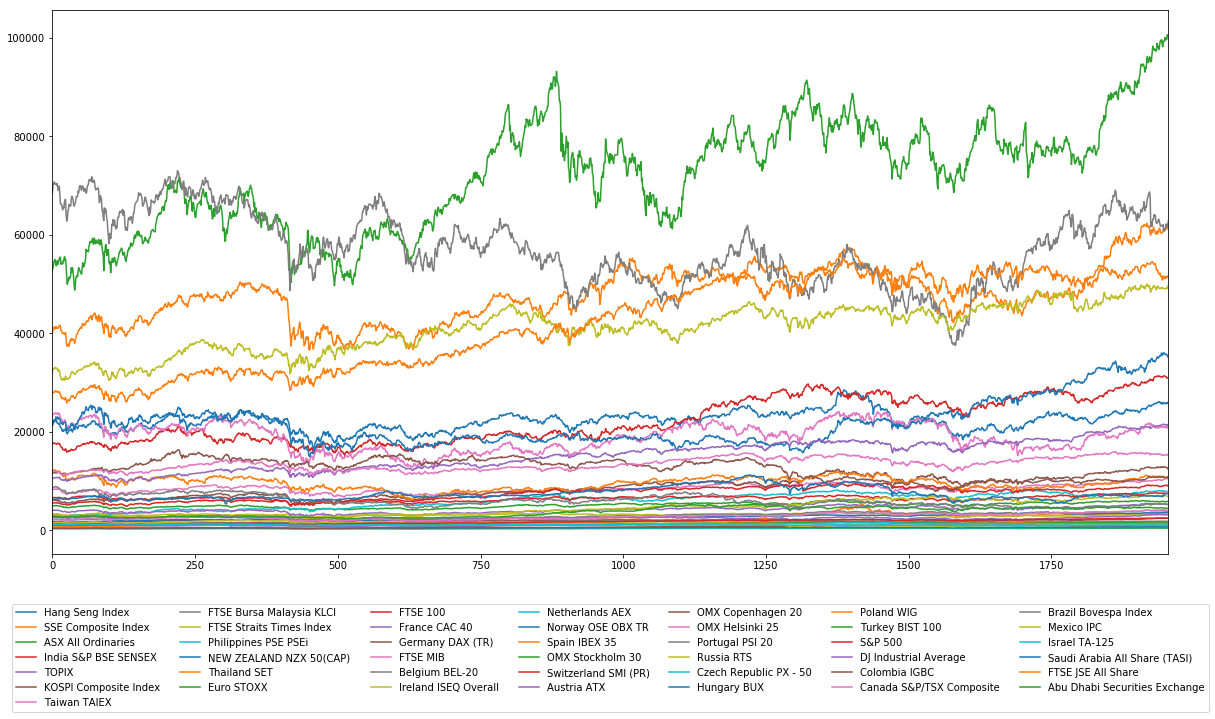

In [3]:
index_close.plot(figsize=(20,10)).legend(loc='lower center', ncol=7, bbox_to_anchor=(0.5,-0.3))

Again this confirms that the data needs to be scaled before serving as an input. In addiiton, all of the indices seem to have trends. We will need to de-trend the time-series (i.e. to make it stationary) for our models to work. A typical way is to apply a first-order differencing to the series.

In [4]:
#Calculate log returns.
daily_ret = np.log(index_close/index_close.shift(1))

#Remove first row
daily_ret = daily_ret.drop(daily_ret.index[0]).reset_index(drop=True)
dates = dates.drop(dates.index[0]).reset_index(drop=True)

daily_ret.head()


Hang Seng Index  SSE Composite Index  ASX All Ordinaries  \
0        -0.002253            -0.010238            0.001453   
1         0.020693             0.011774            0.010113   
2         0.006134            -0.008556            0.001477   
3        -0.006589            -0.019060           -0.003301   
4         0.001225             0.001008            0.002370   

   India S&P BSE SENSEX     TOPIX  KOSPI Composite Index  Taiwan TAIEX  \
0              0.005363  0.008951               0.007914      0.002408   
1              0.007236  0.004163              -0.003260      0.000432   
2              0.000842  0.012493               0.008657      0.014054   
3             -0.004837  0.000773              -0.012908     -0.010891   
4             -0.004291  0.010079               0.006991      0.005264   

   FTSE Bursa Malaysia KLCI  FTSE Straits Times Index  Philippines PSE PSEi  \
0                  0.002331                 -0.001060             -0.015739   
1                  0.009743                  0.008850              0.007773   
2                  0.003820                  0.003490              0.003780   
3                 -0.001354                 -0.005900              0.012374   
4                  0.001207                  0.003259             -0.000195   

               ...                 S&P 500  DJ Industrial Average  \
0              ...                0.015916               0.014840   
1              ...                0.003111              -0.001129   
2              ...                0.000545               0.000157   
3              ...                0.003998               0.003133   
4              ...                0.002873               0.001068   

   Colombia IGBC  Canada S&P/TSX Composite  Brazil Bovespa Index  Mexico IPC  \
0       0.003376                  0.010231              0.021015    0.019670   
1      -0.001070                  0.001783              0.002776   -0.000787   
2      -0.000200                  0.004738              0.006945    0.002971   
3      -0.002730                 -0.004786             -0.003941    0.007115   
4       0.004502                  0.005563             -0.002678   -0.005232   

   Israel TA-125  Saudi Arabia All Share (TASI)  FTSE JSE All Share  \
0       0.022616                       0.012983            0.008234   
1       0.008100                       0.006003            0.003710   
2       0.000100                       0.003488            0.002906   
3      -0.003895                       0.000000           -0.002230   
4       0.000000                       0.000000            0.008838   

   Abu Dhabi Securities Exchange  
0                       0.005264  
1                       0.005932  
2                      -0.002877  
3                       0.003237  
4                       0.000000  

[5 rows x 43 columns]

In [5]:
#Discriptive statistics for the returns data
daily_ret.describe()

Hang Seng Index  SSE Composite Index  ASX All Ordinaries  \
count      1955.000000          1955.000000         1955.000000   
mean          0.000084            -0.000013            0.000085   
std           0.011282             0.013897            0.008745   
min          -0.060183            -0.088732           -0.042998   
25%          -0.005452            -0.005371           -0.004649   
50%           0.000000             0.000000            0.000305   
75%           0.005900             0.006047            0.005148   
max           0.055187             0.056036            0.034368   

       India S&P BSE SENSEX        TOPIX  KOSPI Composite Index  Taiwan TAIEX  \
count           1955.000000  1955.000000            1955.000000   1955.000000   
mean               0.000292     0.000294               0.000180      0.000122   
std                0.009770     0.012612               0.009405      0.009256   
min               -0.061197    -0.099519              -0.064202     -0.057422   
25%               -0.004691    -0.005906              -0.003985     -0.004041   
50%                0.000000     0.000031               0.000000      0.000000   
75%                0.005693     0.007111               0.004980      0.005121   
max                0.037035     0.077153               0.049000      0.044594   

       FTSE Bursa Malaysia KLCI  FTSE Straits Times Index  \
count               1955.000000               1955.000000   
mean                   0.000167                  0.000055   
std                    0.005559                  0.007902   
min                   -0.027381                 -0.055387   
25%                   -0.002583                 -0.003901   
50%                    0.000052                  0.000000   
75%                    0.003095                  0.004381   
max                    0.033222                  0.032896   

       Philippines PSE PSEi              ...                    S&P 500  \
count           1955.000000              ...                1955.000000   
mean               0.000483              ...                   0.000397   
std                0.010368              ...                   0.009375   
min               -0.069885              ...                  -0.068958   
25%               -0.004847              ...                  -0.003318   
50%                0.000153              ...                   0.000263   
75%                0.006243              ...                   0.004931   
max                0.055419              ...                   0.046317   

       DJ Industrial Average  Colombia IGBC  Canada S&P/TSX Composite  \
count            1955.000000    1955.000000               1955.000000   
mean                0.000367      -0.000032                  0.000131   
std                 0.008713       0.009512                  0.007978   
min                -0.057061      -0.050146                 -0.041227   
25%                -0.003146      -0.004548                 -0.003939   
50%                 0.000279       0.000000                  0.000368   
75%                 0.004609       0.004856                  0.004449   
max                 0.041533       0.042654                  0.039410   

       Brazil Bovespa Index   Mexico IPC  Israel TA-125  \
count           1955.000000  1955.000000    1955.000000   
mean              -0.000044     0.000225       0.000098   
std                0.014261     0.008936       0.008768   
min               -0.092110    -0.060620      -0.082087   
25%               -0.008172    -0.004330      -0.002659   
50%                0.000000     0.000028       0.000000   
75%                0.008059     0.005296       0.003524   
max                0.063873     0.041672       0.041516   

       Saudi Arabia All Share (TASI)  FTSE JSE All Share  \
count                    1955.000000         1955.000000   
mean                        0.000099            0.000319   
std                         0.011350            0.009482   
min              

Another thing to note, and also very common to financial time-series is a potential look-ahead bias. For example, for S&P 500 closes at 1600 ET, while Hang Seng closes at 0400 ET the day before. Therefore, we need to apply a proper lag to the index data, depending on where it is trading. We will assume we are a Hong Kong based investor, and operate in Hong Kong timezone.

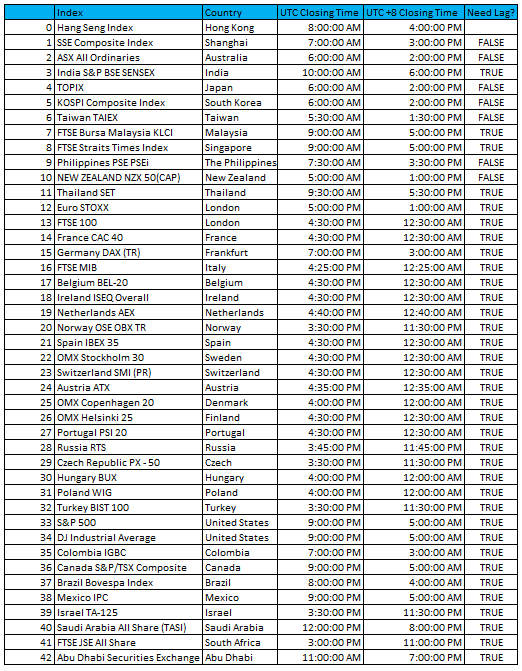

Source: https://en.wikipedia.org/wiki/List_of_stock_exchange_opening_times

In [6]:
#Seperate the indices into 2 classes - lag or no_lag
no_lag = [0, 1, 2, 4, 5, 6, 9, 10]
lag = [i for i in range(0,43) if i not in no_lag]

#Processing the dataset by applying appropriate lags
lagged_data = daily_ret.iloc[:,lag].shift(1)
lagged_data = pd.concat([daily_ret.iloc[:,no_lag], lagged_data], axis=1)

#Removing the first row
lagged_data = lagged_data.drop(lagged_data.index[0]).reset_index(drop=True)
dates = dates.drop(dates.index[0]).reset_index(drop=True)

lagged_data.head()



Hang Seng Index  SSE Composite Index  ASX All Ordinaries     TOPIX  \
0         0.020693             0.011774            0.010113  0.004163   
1         0.006134            -0.008556            0.001477  0.012493   
2        -0.006589            -0.019060           -0.003301  0.000773   
3         0.001225             0.001008            0.002370  0.010079   
4         0.005134             0.005228            0.007860  0.000000   

   KOSPI Composite Index  Taiwan TAIEX  Philippines PSE PSEi  \
0              -0.003260      0.000432              0.007773   
1               0.008657      0.014054              0.003780   
2              -0.012908     -0.010891              0.012374   
3               0.006991      0.005264             -0.000195   
4              -0.000673      0.005170              0.003300   

   NEW ZEALAND NZX 50(CAP)  India S&P BSE SENSEX  FTSE Bursa Malaysia KLCI  \
0                 0.011709              0.005363                  0.002331   
1                 0.001034              0.007236                  0.009743   
2                 0.004042              0.000842                  0.003820   
3                 0.007707             -0.004837                 -0.001354   
4                -0.001958             -0.004291                  0.001207   

               ...                 S&P 500  DJ Industrial Average  \
0              ...                0.015916               0.014840   
1              ...                0.003111              -0.001129   
2              ...                0.000545               0.000157   
3              ...                0.003998               0.003133   
4              ...                0.002873               0.001068   

   Colombia IGBC  Canada S&P/TSX Composite  Brazil Bovespa Index  Mexico IPC  \
0       0.003376                  0.010231              0.021015    0.019670   
1      -0.001070                  0.001783              0.002776   -0.000787   
2      -0.000200                  0.004738              0.006945    0.002971   
3      -0.002730                 -0.004786             -0.003941    0.007115   
4       0.004502                  0.005563             -0.002678   -0.005232   

   Israel TA-125  Saudi Arabia All Share (TASI)  FTSE JSE All Share  \
0       0.022616                       0.012983            0.008234   
1       0.008100                       0.006003            0.003710   
2       0.000100                       0.003488            0.002906   
3      -0.003895                       0.000000           -0.002230   
4       0.000000                       0.000000            0.008838   

   Abu Dhabi Securities Exchange  
0                       0.005264  
1                       0.005932  
2                      -0.002877  
3                       0.003237  
4                       0.000000  

[5 rows x 43 columns]

Now we have a processed dataset. Lets take a look at their correlation structure

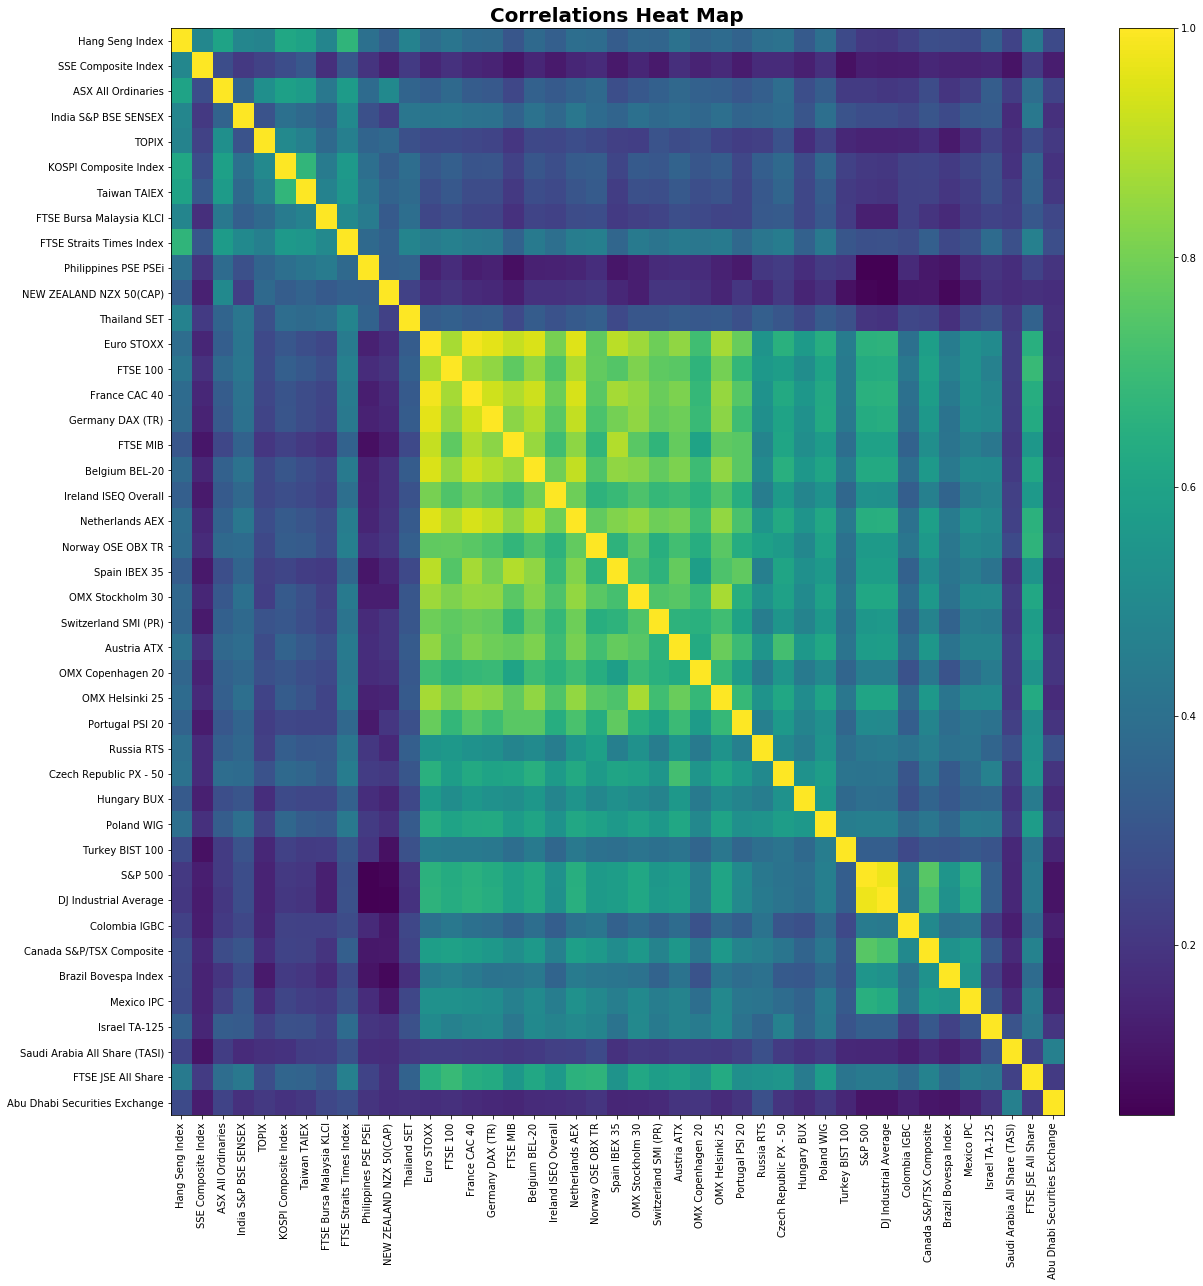

In [7]:
#Calculate correlation
corr = daily_ret.corr()

#Plot the correlation heatmap
plt.figure(figsize=(20,20))
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns)
plt.title('Correlations Heat Map', fontsize=20, fontweight='bold')
plt.show()

From the above chart, you can see indices within the same geographic region tends to have higher correlations. The Asia-Pacific indices tends to have a higher correlations, while those indices have lower correlations with the Europe ones. 

What is more interesting to see, is the euro-zone indices have very high correlations, in particular the developed economies within the region. Perhaps this is explained by very close economic ties amongst those countries, therefore their stock markets tend to have a very high correlation.

Finally, the US indices tend to have higher average correlations to all the other indices. In particular, we can see developed market indices (e.g. Hong Kong, Japan, Singapore) have high correlation compared to developing markets (e.g. Thailand, Philippines). 

## Apply Machine Learning to the data
Now we have the preprocessed data, we can then apply machine learning techniques to learn the data and perform predictions. 

Cross-validation for time series is different from the randomized sampling. An obvious reason is the data is time series in nature, and you do not want to run predictions based on a future time point. Instead splitting the data into training, validation and test sets, we first split the data into n folds, and at the k-th split, the training set is the first k-folds, and the test set will be the (k+1)th fold


In [8]:
from sklearn.model_selection import TimeSeriesSplit

#Seperate the features and the labels
labels = daily_ret.iloc[:,0]
X = daily_ret.drop(daily_ret.columns[0], axis=1).reset_index(drop=True)

#Generate the labels from daily Hang Seng returns
y = np.empty(labels.shape)
y[labels < -0.0005] = -1 #Label -1 for returns lower than -0.05%
y[labels > 0.0005] = 1 #Label 1 for returns greater than 0.05%
y[(labels <= 0.0005 ) & (labels >= -0.0005)] = 0 #Label 0 for the rest

#Splitting into training-validation-test sets
n_splits = 3
tscv = TimeSeriesSplit(n_splits=n_splits)


### Benchmark Model
We first generate the benchmark model. We pick the Gaussian Naive Bayes as stock return distributions are empirically close to Gaussian.

In [9]:
#Import Gaussian Naive Bayes module and performance metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import fbeta_score, precision_score, make_scorer
from sklearn.model_selection import cross_val_score

#Make Scorer object for cross-validation
fbeta = make_scorer(fbeta_score, beta=0.6, average='macro')
precision = make_scorer(precision_score, average='macro')

#Initiate
gnb_estimator = GaussianNB()

#Fit and predict on the CVs
fbeta_gnb = cross_val_score(gnb_estimator, X, y, cv=tscv, scoring=fbeta)
precision_gnb = cross_val_score(gnb_estimator, X, y, cv=tscv, scoring=precision)
    
print("Average F-beta Score: %3.4f" % np.mean(fbeta_gnb))
print("Average Precision Score: %3.4f" % np.mean(precision_gnb))


Average F-beta Score: 0.4922
Average Precision Score: 0.5441


The benchmark model has an F-beta 0.4922 and precision score 0.5441, which is not a bad start. F-beta score is lower than the precision, suggests that some class prediction is better than others.

### Fitting other models
#### 1. Logistics Regression
First model we will try is the simpliest logistics regression model. Classical finance literature often uses linear models to explain asset prices, so this will be our first step.

In [10]:
#Import Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#Define hyperparameter in logistic regression for grid-search
logit_param = {'C':np.linspace(1e-10, 1e10, 20), 'penalty':['l1','l2']}

#Fit the data using Time-Series CV
logit_estimator = GridSearchCV(LogisticRegression(), logit_param, cv=tscv, refit=True, scoring=fbeta)
logit_estimator.fit(X, y)

#Fit and predict on the CVs
fbeta_logit = cross_val_score(logit_estimator.best_estimator_, X, y, cv=tscv, scoring=fbeta)
precision_logit = cross_val_score(logit_estimator.best_estimator_, X, y, cv=tscv, scoring=precision)
    
print("Average F-beta Score: %3.4f" % np.mean(fbeta_logit))
print("Average Precision Score: %3.4f \n" % np.mean(precision_logit))

print("Best C: %3.4f" % logit_estimator.best_params_['C'])
print("Model: %s" % logit_estimator.best_estimator_)

Average F-beta Score: 0.4692
Average Precision Score: 0.4577 

Best C: 1052631578.9474
Model: LogisticRegression(C=1052631578.9473684, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


We can see when we fit a logistic regression, this model is worse than our benchmark model, with an decrease in F-beta score . During ther grid search, there are C values where no 'Neutral' labels are predicted.

The best logistic regression model chosen is with a L1 regulatization, with C = 1052631578.9474.

Next, lets zoom in the classification results on each fold using the best model.

In [11]:
#Import neccesary function
from sklearn.metrics import classification_report

#Running index
iteration = 1

for train_index, test_index in tscv.split(X):
    predict_logistic = logit_estimator.best_estimator_.fit(X.iloc[train_index,:], y[train_index]).predict(X.iloc[test_index, :])
    print('Split: %d' % iteration)
    print('Training Size: %d; Test Size: %d' % (len(train_index), len(test_index)))
    print(classification_report(y[test_index], predict_logistic, target_names=['Up', 'Neutral', 'Down']))
    print('\n')
    iteration += 1

Split: 1
Training Size: 491; Test Size: 488
             precision    recall  f1-score   support

         Up       0.66      0.76      0.71       209
    Neutral       0.00      0.00      0.00        47
       Down       0.70      0.74      0.72       232

avg / total       0.61      0.68      0.64       488



Split: 2
Training Size: 979; Test Size: 488
             precision    recall  f1-score   support

         Up       0.66      0.69      0.68       213
    Neutral       0.00      0.00      0.00        51
       Down       0.64      0.76      0.70       224

avg / total       0.58      0.65      0.62       488



Split: 3
Training Size: 1467; Test Size: 488
             precision    recall  f1-score   support

         Up       0.72      0.78      0.75       216
    Neutral       0.00      0.00      0.00        46
       Down       0.74      0.84      0.79       226

avg / total       0.66      0.73      0.70       488





As we feed in more training data, the model has better 'Up' label precision. Also note that there are no 'Neutral' predictions. This has practical consequences, as having no 'Neutral' prediction suggests you will need to trade everyday, but in fact you might not need to. Nonethless, fitting a logistic regression is not bad in this very simple case, but lets see if we can do better.

#### 2. AdaBoost
Next we will try an ensemble methods to see if that improves our predictability.

In [12]:
#Import Ensemble methods
from sklearn.ensemble import AdaBoostClassifier

#Set Parameters for AdaBoost Grid Search
adaboost_param = {'n_estimators':[1,10,100,300,500], 'learning_rate':[0.001,0.01,0.1,1,10]}

#Set Grid Search and fit
adaboost_estimator = GridSearchCV(AdaBoostClassifier(random_state=10), adaboost_param, cv=tscv, refit=True, scoring=fbeta)
adaboost_estimator.fit(X, y)

#Calculate F-beta and precision score
fbeta_adaboost = cross_val_score(adaboost_estimator.best_estimator_, X, y, cv=tscv, scoring=fbeta)
precision_adaboost = cross_val_score(adaboost_estimator.best_estimator_, X, y, cv=tscv, scoring=precision)
    
print("Average F-beta Score: %3.4f" % np.mean(fbeta_adaboost))
print("Average Precision Score: %3.4f" % np.mean(precision_adaboost))

print("Best number of estimators: %d" % adaboost_estimator.best_params_['n_estimators'])
print("Best learning rate: %3.4f" % adaboost_estimator.best_params_['learning_rate'])
print("Model: %s" % adaboost_estimator.best_estimator_)

Average F-beta Score: 0.6174
Average Precision Score: 0.6827
Best number of estimators: 500
Best learning rate: 0.1000
Model: AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=500, random_state=10)


In [13]:
#Running index
iteration = 1

for train_index, test_index in tscv.split(X):
    predict_logistic = adaboost_estimator.best_estimator_.fit(X.iloc[train_index,:], y[train_index]).predict(X.iloc[test_index, :])
    print('Split: %d' % iteration)
    print('Training Size: %d; Test Size: %d' % (len(train_index), len(test_index)))
    print(classification_report(y[test_index], predict_logistic, target_names=['Up', 'Neutral', 'Down']))
    print('\n')
    iteration += 1

Split: 1
Training Size: 491; Test Size: 488
             precision    recall  f1-score   support

         Up       0.69      0.76      0.72       209
    Neutral       0.56      0.19      0.29        47
       Down       0.72      0.75      0.73       232

avg / total       0.69      0.70      0.68       488



Split: 2
Training Size: 979; Test Size: 488
             precision    recall  f1-score   support

         Up       0.67      0.69      0.68       213
    Neutral       0.69      0.22      0.33        51
       Down       0.67      0.75      0.71       224

avg / total       0.67      0.67      0.66       488



Split: 3
Training Size: 1467; Test Size: 488
             precision    recall  f1-score   support

         Up       0.71      0.75      0.73       216
    Neutral       0.71      0.26      0.38        46
       Down       0.74      0.78      0.76       226

avg / total       0.72      0.72      0.71       488





We can see by using Adaboost, there is an overall improvement in the fitting. Precision has been improved, and at the same time the overall F-beta score has improved from 0.4692 to 0.6174. Therefore, Adaboost seems to be a better choice over logistic regression. Also, from the classification report, the AdaBoost model is better than logistic regression as there are Neutral labels predicted, thus improving the overall F-beta score.

We can generate chart plotting the feature importance on the optimized model.

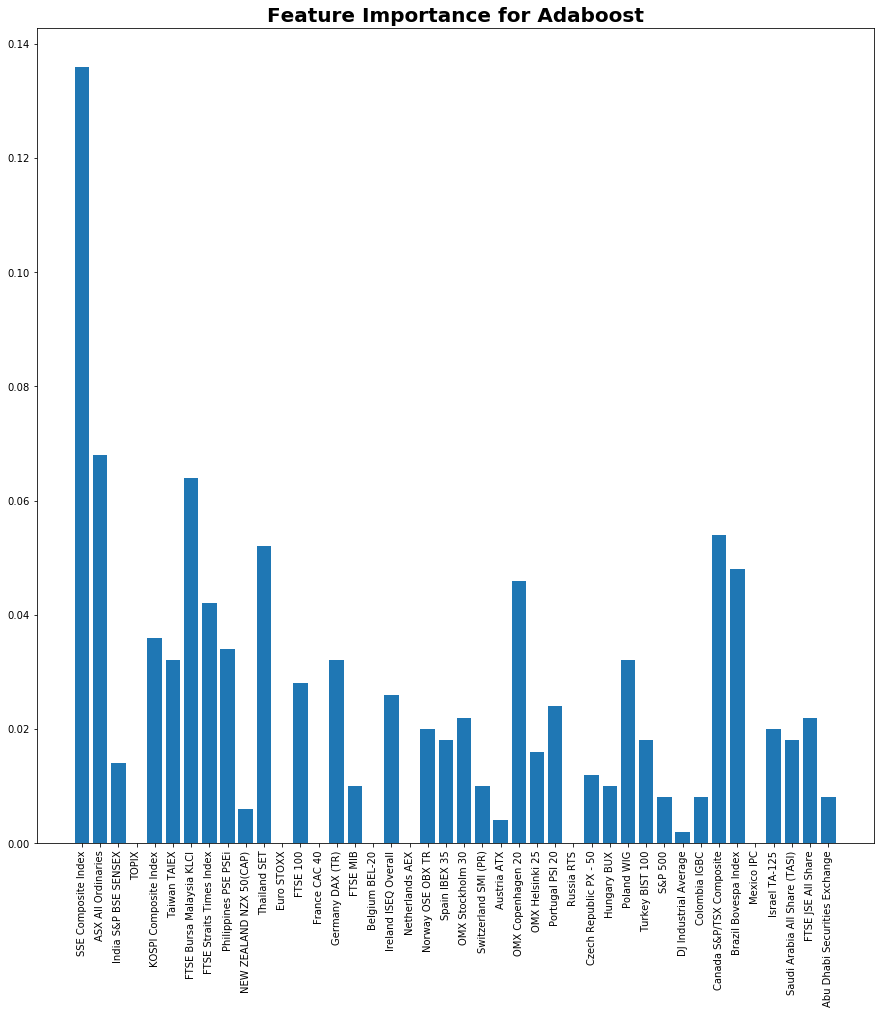

In [14]:
importance = adaboost_estimator.best_estimator_.feature_importances_ #Get importance coefficients

ind = np.arange(len(importance))

#Plot chart
fig = plt.figure(figsize=(15,15))
plt.bar(ind, importance)
plt.xticks(ind, X.columns, rotation='vertical')
plt.title('Feature Importance for Adaboost', fontsize=20, fontweight='bold')
plt.show()

Without surprise, we see that indices within Asia-Pacific region has more importance in predicting Hang Seng index's movement. Again they sit in the same timezone, and their economies are more closely ties to each other so it is expected. Also companies that are constituents within Hang Seng are likely to have business within the region as well, this will also contribute to the significance of the feature. To my surprise, TOPIX has no significance in predicting Hang Seng.

Within Europe, UK has the highest significance, and some contributions are coming from smaller economies like Czech, Portugal and Hungary.

Interestingly, US indices seem to have minor predictive power in Hang Seng movements. S&P 500 only has around 0.01 importance, and DJ Average has none. While Canada, Brazil and Mexico has high importance is something quite interesting to see as well.




#### 3. Feedforward Neural Network
Next we will turn to deep learning techniques to see if this will further improve our prediction. First we will look at a simple Feedforward Neural Network. 

We will using Keras library with a tensorflow backend as the main Neural Network library. 

In [45]:
#Import Keras module
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils.np_utils import to_categorical

#Splitting the data into 80% training and 20% test, but has to preserve the ordering
train_size = 0.8
cut_index = int(np.floor(0.8 * X.shape[0]))
X_train = np.array(X.iloc[0:(cut_index-1),:])
X_test = np.array(X.iloc[cut_index:X.shape[0],:])
y_train = y[0:(cut_index-1)]
y_test = y[cut_index:len(y)]

#Checking
#if X_train.shape[0] == len(y_train):
    #print("Yes")
#if X_test.shape[0] == len(y_test):
    #print("Yes")
#print(X_train.head())
#print(X_test.head())
#print(y_train)
#print(y_test)

#Parameters
drop_out = 0.6
input_dim = X.shape[1]
num_epoch = 30

#Preproc the y_train and y_test using to_categorical function
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)


In [16]:
from keras import backend as K

#Define f-beta score
def fbeta(y_true, y_pred, threshold_shift=0):
    beta = 0.6

    # just in case of hipster activation at the final layer
    y_pred = K.clip(y_pred, 0, 1)

    # shifting the prediction threshold from .5 if needed
    y_pred_bin = K.round(y_pred + threshold_shift)

    tp = K.sum(K.round(y_true * y_pred_bin), axis=1) + K.epsilon()
    fp = K.sum(K.round(K.clip(y_pred_bin - y_true, 0, 1)), axis=1)
    fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)), axis=1)

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    beta_squared = beta ** 2
    return K.mean((beta_squared + 1) * (precision * recall) / (beta_squared * precision + recall + K.epsilon()))
    

In [17]:
#Setting up the instance
model = Sequential()

#Set Neural Network Structure
#------------------------------------------
#First layer
model.add(Dense(12, activation='relu', input_dim=input_dim, use_bias=True))
model.add(Dropout(drop_out))

#Second layer
#model.add(Dense(8, activation='relu', input_dim=input_dim, use_bias=True))
#model.add(Dropout(drop_out))

#Output Layer
model.add(Dense(3, activation='softmax'))
model.summary()
#------------------------------------------

#Define Optimizer, using Stochastic Gradient Decent
adm = optimizers.Nadam(lr=0.00075)

#Compile Model
model.compile(loss='categorical_crossentropy', optimizer=adm, metrics=[fbeta])

#Fitting the model
model.fit(X_train, y_train, epochs = num_epoch, verbose=2, validation_data=(X_test, y_test), shuffle=False, batch_size=1)

#Evaluation
score = model.evaluate(X_test, y_test)

#Predict
pred = model.predict(X_test, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                516       
_________________________________________________________________
dropout_1 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 39        
Total params: 555
Trainable params: 555
Non-trainable params: 0
_________________________________________________________________
Train on 1563 samples, validate on 391 samples
Epoch 1/30
2s - loss: 0.9786 - fbeta: 0.0653 - val_loss: 0.9053 - val_fbeta: 0.1841
Epoch 2/30
1s - loss: 0.8844 - fbeta: 0.3301 - val_loss: 0.8507 - val_fbeta: 0.4169
Epoch 3/30
1s - loss: 0.8516 - fbeta: 0.4408 - val_loss: 0.8200 - val_fbeta: 0.4731
Epoch 4/30
1s - loss: 0.8325 - fbeta: 0.4696 - val_loss: 0.8018 - val_fbeta: 0.5473
Epoch 5/30
1s - loss: 0.8

We fitted a Feed-Forward Neural Network with 1 hidden layer, consisting 12 perceptrons. We used the Nestrov Adam optimization with 30 eopchs, and at each layer using ReLu activation units with a dropout probability of 0.6. 

Overall the model is better than the AdaBoost algorithm, with an overall F-beta score at around 0.66. This suggests the Neural Network is better over all the previous models.

#### 4. Recurrent Neural Network - LSTM
Finally, we will turn ourselves to try using LSTM network. LSTM is known for its superior performance to fitting time-series data. 

One of the drawbacks of the models we used is that we assume the data is memory-less. This means we assume the present data is purely determined by the features provided, but not influenced by previous states. However in a financial context, this is not true as there are numerous studies suggesting momentum effects. (Jegadeesh, Narashimhan 1990 - Evidence of predictable behavious of security returns, Journal of Finance 45, 881-898)

LSTM provides a solution to overcome the above problems, which the network itself can pass information and pick up the long-term dependencies of time-series data.

In [51]:
from keras.layers import LSTM

#Setting up the instance
lstm_model = Sequential()

#Adding 1st LSTM layer
lstm_model.add(LSTM(12, input_shape=(1563,42), return_sequences=True))
lstm_model.add(Dropout(drop_out))

#Adding 2nd LSTM Layer
#lstm_model.add(LSTM(32, return_sequences=True))
#lstm_model.add(Dropout(drop_out))

#Adding Output Layer
lstm_model.add(Dense(3, activation='softmax'))
lstm_model.summary()

#Optimization
#Define Optimizer, using Stochastic Gradient Decent
lstm_model.compile(loss='categorical_crossentropy', optimizer=adm, metrics=[fbeta])

#Fitting the model
lstm_model.fit(X_train, y_train, epochs = num_epoch, verbose=2, validation_data=(X_test, y_test), shuffle=False, batch_size=1)

#Evaluation
lstm_score = lstm_model.evaluate(X_test, y_test)

#Predict
lstm_pred = lstm_model.predict(X_test, verbose=1)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 1563, 12)          2640      
_________________________________________________________________
dropout_24 (Dropout)         (None, 1563, 12)          0         
_________________________________________________________________
dense_22 (Dense)             (None, 1563, 3)           39        
Total params: 2,679
Trainable params: 2,679
Non-trainable params: 0
_________________________________________________________________


ValueError: Error when checking input: expected lstm_28_input to have 3 dimensions, but got array with shape (1563, 42)